<img src="./02"/>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38\\bin\\"
import pydotplus

In [2]:
#sl:satisfaction_level ---False:MinMaxScaler True:StandardScaler
#le:last_evaluation ---False:MinMaxScaler True:StandardScaler
#npr:number_project ---False:MinMaxScaler True:StandardScaler
#amh:average_monthly_hours ---False:MinMaxScaler True:StandardScaler
#tsc:time_spend_company ---False:MinMaxScaler True:StandardScaler
#wa:work_accident ---False:MinMaxScaler True:StandardScaler
#pl5:promotion_last_5years ---False:MinMaxScaler True:StandardScaler
#dp:department ---False:LabelEncoder True:OneHostEncoder
#slr:salary ---False:LabelEncoder True:OneHostEncoder
def hr_preprocessing(sl=False,le=False,npr=False,amh=False,
                     tsc=False,wa=False,pl5=False,dp=False,
                     slr=False,lower_d=False,
                     ld_n=1):
    df = pd.read_csv('../data/HR.csv')
    #清洗数据
    df = df.dropna(subset = ["satisfaction_level","last_evaluation"])
    df = df[df["satisfaction_level"]<=1][df["salary"]!="nme"]
     #获得标注
    Label = df["left"]
    df = df.drop(["left"],axis=1)
    #特征选择
    #考虑相关性，可以去除几个属性，但因为总体的属性不多，暂不处理
    #特征处理
    scaler_list = [sl,le,npr,amh,tsc,wa,pl5]
    column_list = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company"
                   ,"Work_accident","promotion_last_5years"]
    for i in range(len(scaler_list)):
        if not scaler_list[i]:
            df[column_list[i]] = MinMaxScaler().fit_transform(df[column_list[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:
            df[column_list[i]] = StandardScaler().fit_transform(df[column_list[i]].values.reshape(-1,1)).reshape(1,-1)[0]
    scaler_list = [slr,dp]
    column_list = ["salary","department"]
    #处理离散值数值化
    for i in range(len(scaler_list)):
        if not scaler_list[i]:
            if column_list[i] == "salary":
                df[column_list[i]] = [map_salary(s) for s in df["salary"].values]
            else:
                df[column_list[i]] = LabelEncoder().fit_transform(df[column_list[i]])
            #对于labelEncoder的情况下还需要进行归一化处理
            df[column_list[i]] = MinMaxScaler().fit_transform(df[column_list[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:
            df = pd.get_dummies(df,columns=[column_list[i]])
    #降维
    if lower_d:
        return PCA(n_components=ld_n).fit_transform(df.values),Label
    return df,Label

def map_salary(s):
    d = dict([("low",0),("medium",1),("high",2)])
    return d.get(s,0)

In [3]:
X,Y = hr_preprocessing()
print(X)
print(Y)

       satisfaction_level  last_evaluation  number_project  \
0                0.318681         0.265625             0.0   
1                0.780220         0.781250             0.6   
2                0.021978         0.812500             1.0   
3                0.692308         0.796875             0.6   
4                0.307692         0.250000             0.0   
5                0.351648         0.218750             0.0   
6                0.010989         0.640625             0.8   
7                0.912088         0.765625             0.6   
8                0.879121         1.000000             0.6   
9                0.362637         0.265625             0.0   
10               0.395604         0.281250             0.0   
11               0.021978         0.703125             0.8   
12               0.824176         0.875000             0.4   
13               0.351648         0.296875             0.0   
15               0.318681         0.281250             0.0   
16      

/Users/roy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
def doMetrics(Y_true,Y_predict,clf_name):
    from sklearn.metrics import accuracy_score,recall_score,f1_score
    print(clf_name,"_Acc:",accuracy_score(Y_true,Y_predict))
    print(clf_name,"_recall:",recall_score(Y_true,Y_predict))
    print(clf_name,"_f1-score:",f1_score(Y_true,Y_predict))

In [5]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#划分训练集与测试集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,Y_train)

Y_predict = lr.predict(X_test)
Y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
from sklearn.metrics import confusion_matrix
print("准确率",lr.score(X_test,Y_test))#准确率

from sklearn.metrics import precision_score
print("精确率",precision_score(Y_test,Y_predict))#精确率

from sklearn.metrics import  recall_score
print("召回率",recall_score(Y_test,Y_predict))#召回率

from sklearn.metrics import f1_score
print("f1分值",f1_score(Y_test,Y_predict))

print(confusion_matrix(Y_test,Y_predict))

准确率 0.778666666667
精确率 0.572398190045
召回率 0.347527472527
f1分值 0.432478632479
[[2083  189]
 [ 475  253]]


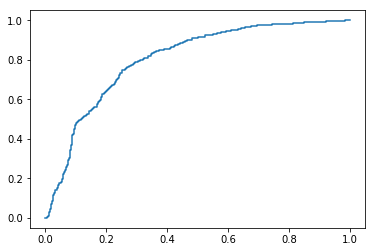

In [7]:
#得到逻辑回归的决策值，一般为0，可以改变阈值
decision_score=lr.decision_function(X_test)

#sklearn中的ROC曲线
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(Y_test,decision_score)
plt.plot(fpr,tpr)
plt.show()

[-1.45588262 -2.13198616 -1.66267978 ..., -0.69490785 -0.05624995
 -0.88591923]


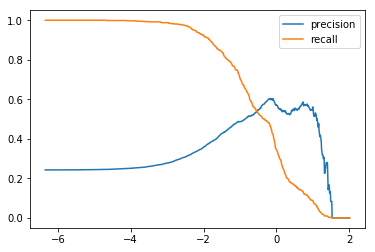

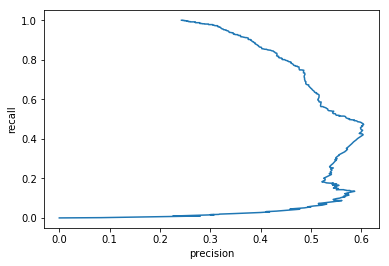

In [8]:
decision_score=lr.decision_function(X_test)
print(decision_score)
precision=[]
recalls=[]
#以决策值阈值的最小值和最大值作为范围，遍历寻找适合的阈值
thresholds=np.arange(np.min(decision_score),np.max(decision_score),0.01)
for threshold in thresholds:
    y_predict2=np.array(decision_score>=threshold,dtype='int')
    precision.append(precision_score(Y_test,y_predict2))
    recalls.append(recall_score(Y_test,y_predict2))

plt.plot(thresholds,precision,label='precision')
plt.plot(thresholds,recalls,label='recall')
plt.legend()
plt.show()

plt.plot(precision,recalls)
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

### 思考：是否原始数据非线性可分，用其他模型试试
### KNN

In [19]:

from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#对决策树进行画图和输出
def plotTree(clf,clf_name,feature_names):
    dot_data = export_graphviz(clf,
                               out_file=None,
                               feature_names=feature_names,
                               class_names=["NL","L"],
                               filled=True,
                               rounded=True,
                               special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf(clf_name + ".pdf")

models = []
models.append(("KNN",KNeighborsClassifier(n_neighbors=3)))
models.append(("GaussianNB",GaussianNB()))
models.append(("BernoulliNB",BernoulliNB()))
models.append(("DecisionTreeGini",DecisionTreeClassifier()))
models.append(("DecisionTreeEntropy",DecisionTreeClassifier(criterion="entropy")))
models.append(("SVM Classifier",SVC(C=100)))
models.append(("RandomForestClassifier",RandomForestClassifier(max_features=None,bootstrap=True)))
models.append(("AdaBoost Classifier",AdaBoostClassifier(n_estimators=1000)))

for clf_name, clf in models:
    clf.fit(X_train, Y_train)
    Y_predict = clf.predict(X_test)
    doMetrics(Y_test,Y_predict,clf_name)
    if clf_name == "DecisionTreeGini" or clf_name == "DecisionTreeEntropy":
        plotTree(clf,clf_name,X_train.columns.values)
    

KNN _Acc: 0.951666666667
KNN _recall: 0.93956043956
KNN _f1-score: 0.904163912756
GaussianNB _Acc: 0.786
GaussianNB _recall: 0.712912087912
GaussianNB _f1-score: 0.617857142857
BernoulliNB _Acc: 0.838
BernoulliNB _recall: 0.486263736264
BernoulliNB _f1-score: 0.592964824121
DecisionTreeGini _Acc: 0.980666666667
DecisionTreeGini _recall: 0.961538461538
DecisionTreeGini _f1-score: 0.960219478738
DecisionTreeEntropy _Acc: 0.978333333333
DecisionTreeEntropy _recall: 0.962912087912
DecisionTreeEntropy _f1-score: 0.955691888207
SVM Classifier _Acc: 0.940333333333
SVM Classifier _recall: 0.884615384615
SVM Classifier _f1-score: 0.877982276755
RandomForestClassifier _Acc: 0.987
RandomForestClassifier _recall: 0.95467032967
RandomForestClassifier _f1-score: 0.972708187544
AdaBoost Classifier _Acc: 0.954
AdaBoost Classifier _recall: 0.90521978022
AdaBoost Classifier _f1-score: 0.90521978022


## 决策树面临的问题
- 连续值切分
- 规则用尽
- 过拟合